In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [3]:
# 데이터 불러오기
data = pd.read_csv('23_DS_Project_수정/train.csv')
data

,index,Num,prod,insp,date,buydate,ingr_A,ingr_B,ingr_C,wtcd,gram,label
0,2,20230618산천074246A,GBMD,C,2023-06-18,2023-09-18,399.4063,6.4035,6.9409,F3,970.32,1
1,9,20230518창하053396B,GGMD,L,2023-05-18,2023-07-08,130.0951,5.8245,6.2857,F1,2490.08,0
2,10,20230505창하063135B,KCMD,C,2023-05-05,2023-07-02,131.5192,5.8040,6.0607,F3,487.37,0
3,12,20230505산천001612A,GBMD,K,2023-05-05,2023-06-04,128.5978,6.8720,6.1705,F3,707.94,1
4,16,20230409수성016088C,JJBB,K,2023-04-09,2023-04-14,320.6915,5.7474,6.3695,F3,1978.66,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49974,20230620산천071749A,KCMD,C,2023-06-20,2023-07-08,405.6626,6.2900,6.8467,F3,777.82,0
9996,49980,20230515오포006371A,GGMD,K,2023-05-15,2023-05-25,129.1664,6.0345,6.5257,F3,2548.73,0
9997,49981,20230614창하058590B,GGMD,L,2023-06-14,2023-09-10,403.9895,6.2698,6.7227,F1,2769.71,0
9998,49985,20230405산천007488A,JJBB,K,2023-04-05,2023-04-16,309.4751,5.7987,6.5499,F3,2005.46,0


In [4]:
data

,index,Num,prod,insp,date,buydate,ingr_A,ingr_B,ingr_C,wtcd,gram,label
0,2,20230618산천074246A,GBMD,C,2023-06-18,2023-09-18,399.4063,6.4035,6.9409,F3,970.32,1
1,9,20230518창하053396B,GGMD,L,2023-05-18,2023-07-08,130.0951,5.8245,6.2857,F1,2490.08,0
2,10,20230505창하063135B,KCMD,C,2023-05-05,2023-07-02,131.5192,5.8040,6.0607,F3,487.37,0
3,12,20230505산천001612A,GBMD,K,2023-05-05,2023-06-04,128.5978,6.8720,6.1705,F3,707.94,1
4,16,20230409수성016088C,JJBB,K,2023-04-09,2023-04-14,320.6915,5.7474,6.3695,F3,1978.66,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49974,20230620산천071749A,KCMD,C,2023-06-20,2023-07-08,405.6626,6.2900,6.8467,F3,777.82,0
9996,49980,20230515오포006371A,GGMD,K,2023-05-15,2023-05-25,129.1664,6.0345,6.5257,F3,2548.73,0
9997,49981,20230614창하058590B,GGMD,L,2023-06-14,2023-09-10,403.9895,6.2698,6.7227,F1,2769.71,0
9998,49985,20230405산천007488A,JJBB,K,2023-04-05,2023-04-16,309.4751,5.7987,6.5499,F3,2005.46,0


In [5]:
data['ingr_A_per'] = data['ingr_A'] / data['gram']
data['ingr_B_per'] = data['ingr_B'] / data['gram']
data['ingr_C_per'] = data['ingr_C'] / data['gram']
data['air'] = (data['gram'] - data['ingr_A'] - data['ingr_B'] - data['ingr_C']) / data['gram']

In [6]:
data['period'] = pd.to_datetime(data['buydate']).sub(pd.to_datetime(data['date']))
data['period'] = data['period'].apply(lambda x: x.days)

In [7]:
data['month'] = pd.to_datetime(data['date']).dt.month

In [8]:
data['month']

0       6
1       5
2       5
3       5
4       4
       ..
9995    6
9996    5
9997    6
9998    4
9999    4
Name: month, Length: 10000, dtype: int64

In [9]:
data.keys()

Index(['index', 'Num', 'prod', 'insp', 'date', 'buydate', 'ingr_A', 'ingr_B',
       'ingr_C', 'wtcd', 'gram', 'label', 'ingr_A_per', 'ingr_B_per',
       'ingr_C_per', 'air', 'period', 'month'],
      dtype='object')

In [18]:
# 특성과 타겟 분리
features = ['ingr_A_per','ingr_B_per','ingr_C_per','gram','air','period','month']
X = data[features]
y = data['label']

# 학습용과 검증용 데이터로 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree 모델 생성 및 학습
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
trian_y_pred = model.predict(X_train)
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(train_pred,y_train)
zero_accuracy = accuracy_score(y_val, [0 for _ in range(len(X_val))])
random_accuracy = accuracy_score(y_val, np.random.choice([0,1],len(y_val)))
print("Validation Accuracy:", accuracy)
print("All Zero Accuracy:", zero_accuracy)
print("Train Accuracy:", train_accuracy)
print("Random Accuracy:", random_accuracy)

Validation Accuracy: 0.6835
All Zero Accuracy: 0.788
Train Accuracy: 1.0
Random Accuracy: 0.5025


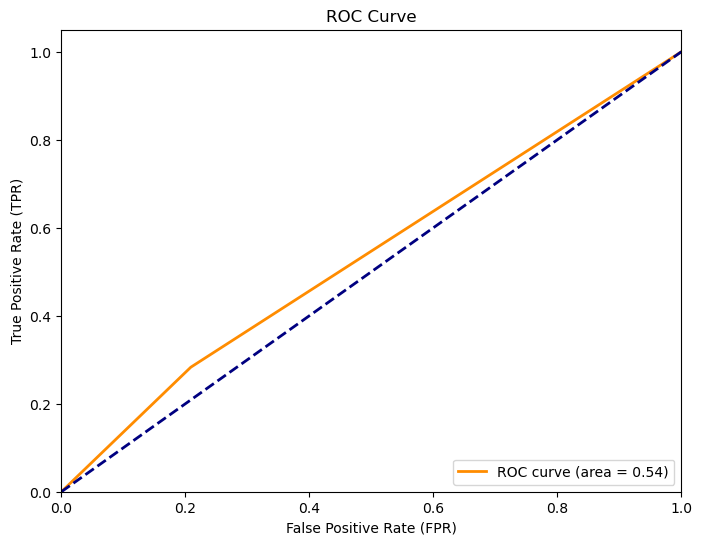

ROC AUC Score: 0.5371312613734316


In [19]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

y_pred_prob = model.predict(X_val)

# 실제 레이블과 예측 확률을 사용하여 ROC 곡선을 계산합니다.
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

# ROC 곡선을 그립니다.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# ROC AUC (Area Under the Curve)를 계산합니다.
roc_auc = roc_auc_score(y_val, y_pred_prob)
print('ROC AUC Score:', roc_auc)

In [89]:
np.random.choice([0,1],5)

array([0, 1, 1, 0, 0])

In [57]:
DecisionTreeClassifier.feature_importances_